# Mount Google Drive to Google Colab

In [25]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Import Libraries

In [26]:
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial
import PIL
import PIL.Image

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_files 
from keras.utils import np_utils

from keras.preprocessing import image
from tqdm import tqdm # progress bar

np.random.seed(49) # note that you must use the same seed to ensure consistentcy in your training/validation/testing
tf.random.set_seed(49)

# Create Train and Validation Set

In [49]:
data_dir = "/content/drive/MyDrive/Gladies_VA_Plants"
batch_size = 32;
# IMPORTANT: Depends on what pre-trained model you choose, you will need to change these dimensions accordingly
img_height = 150; 
img_width = 150;
def split(img_height, img_width, batch_size):
  # Training Dataset
  train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      data_dir,
      validation_split = 0.2,
      subset = "training",
      seed = 49,
      image_size= (img_height, img_width),
      batch_size = batch_size
  )

  val_ds = tf.keras.preprocessing.image_dataset_from_directory(
      data_dir,
      validation_split = 0.2,
      subset = "validation",
      seed = 49,
      image_size= (img_height, img_width),
      batch_size = batch_size
  )

  test_ds = tf.keras.preprocessing.image_dataset_from_directory(
      data_dir,
      validation_split = 0.2,
      subset = "validation",
      seed = 49,
      image_size= (img_height, img_width),
      batch_size = batch_size
  )
    
  return train_ds, val_ds, test_ds

# Visualize the Data

Found 237 files belonging to 5 classes.
Using 190 files for training.
Found 237 files belonging to 5 classes.
Using 47 files for validation.


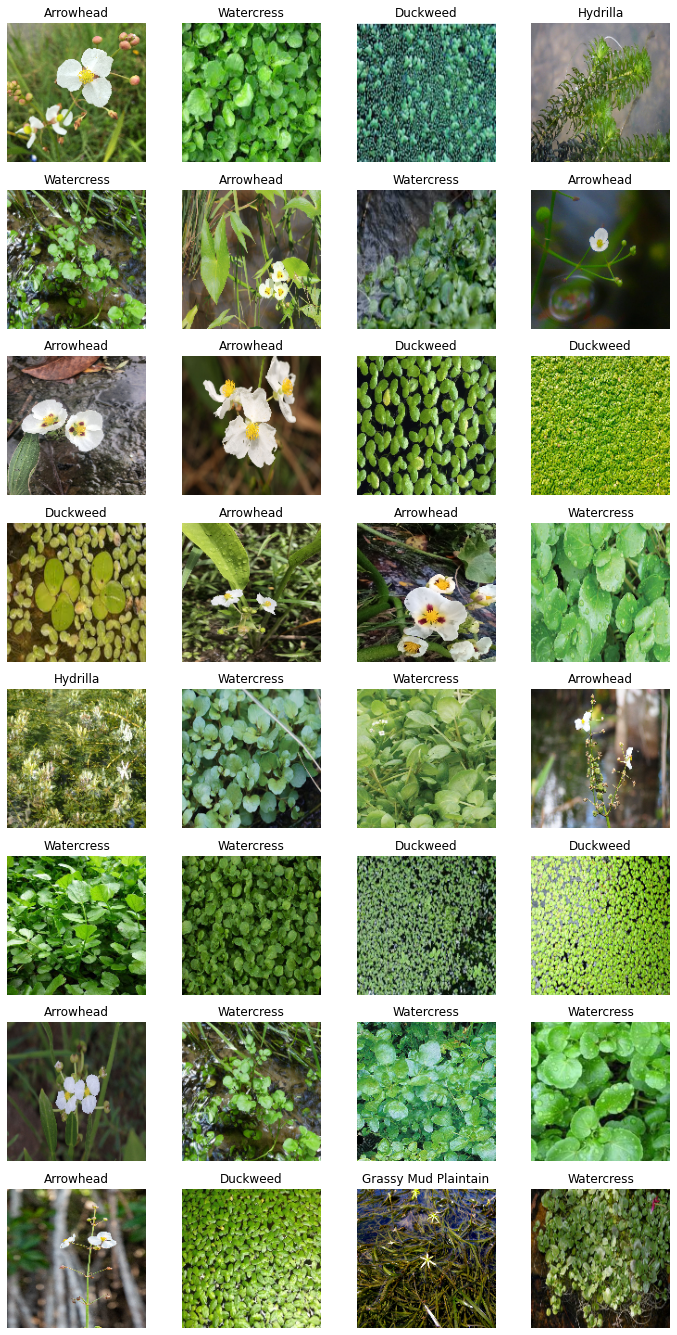

In [28]:
import matplotlib.pyplot as plt
# https://keras.io/examples/vision/image_classification_from_scratch/

img_width, img_height, batch_size = 150, 150, 32
train_ds, val_ds = split(img_width, img_height, batch_size)
class_names = ['Arrowhead',  'Duckweed', 'Grassy Mud Plaintain', 'Hydrilla',  'Watercress']
# Rows and columns are set to fit one training batch (32)
n_rows = int(batch_size/4)
n_cols = int(batch_size/n_rows)
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=12)
        plt.subplots_adjust(wspace=.2, hspace=.2)

# Model 1


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [30]:
# YOUR CODE STARTS HERE
# refer to https://www.tensorflow.org/tutorials/images/classification
num_classes = 5
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [31]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
#Model Summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 64)       

In [33]:
epochs=30
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/30
6/6 [==============================] - 10s 387ms/step - loss: 1.9430 - accuracy: 0.2320 - val_loss: 1.5260 - val_accuracy: 0.4043
Epoch 2/30
6/6 [==============================] - 9s 319ms/step - loss: 1.4172 - accuracy: 0.4476 - val_loss: 1.3560 - val_accuracy: 0.5106
Epoch 3/30
6/6 [==============================] - 9s 319ms/step - loss: 1.2685 - accuracy: 0.5010 - val_loss: 1.3252 - val_accuracy: 0.4681
Epoch 4/30
6/6 [==============================] - 9s 320ms/step - loss: 0.9806 - accuracy: 0.6674 - val_loss: 1.0656 - val_accuracy: 0.6170
Epoch 5/30
6/6 [==============================] - 9s 320ms/step - loss: 0.8271 - accuracy: 0.7013 - val_loss: 0.8707 - val_accuracy: 0.6170
Epoch 6/30
6/6 [==============================] - 9s 319ms/step - loss: 0.7031 - accuracy: 0.6908 - val_loss: 0.9653 - val_accuracy: 0.4894
Epoch 7/30
6/6 [==============================] - 9s 317ms/step - loss: 0.7065 - accuracy: 0.7023 - val_loss: 1.1053 - val_accuracy: 0.5319
Epoch 8/30
6/6 [===

# Visualize training results

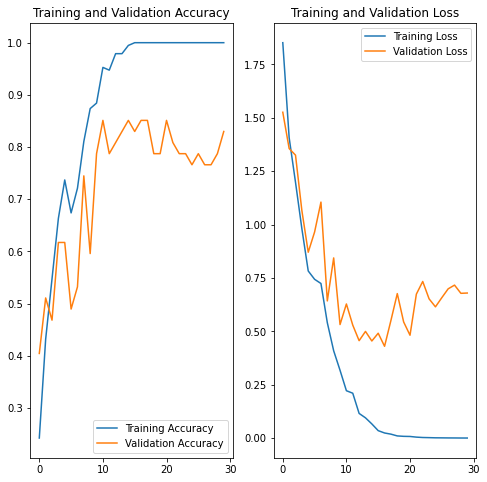

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Data Augmentation

In [35]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

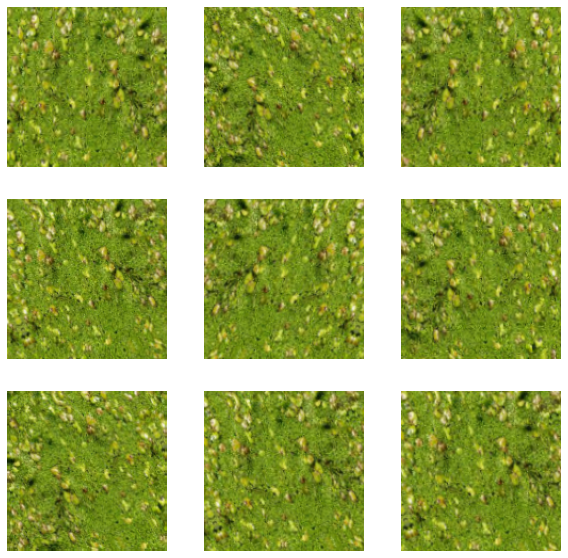

In [36]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Dropout

In [37]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Comple and train the model

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 37, 37, 64)       

In [40]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
6/6 [==============================] - 10s 340ms/step - loss: 1.9627 - accuracy: 0.2822 - val_loss: 1.4271 - val_accuracy: 0.2340
Epoch 2/50
6/6 [==============================] - 9s 314ms/step - loss: 1.4333 - accuracy: 0.3330 - val_loss: 1.4359 - val_accuracy: 0.3404
Epoch 3/50
6/6 [==============================] - 9s 314ms/step - loss: 1.1932 - accuracy: 0.4931 - val_loss: 1.2275 - val_accuracy: 0.4894
Epoch 4/50
6/6 [==============================] - 9s 318ms/step - loss: 1.2329 - accuracy: 0.5190 - val_loss: 1.1279 - val_accuracy: 0.6596
Epoch 5/50
6/6 [==============================] - 9s 318ms/step - loss: 0.9883 - accuracy: 0.5012 - val_loss: 1.1284 - val_accuracy: 0.4468
Epoch 6/50
6/6 [==============================] - 9s 314ms/step - loss: 0.8818 - accuracy: 0.5630 - val_loss: 0.9304 - val_accuracy: 0.4468
Epoch 7/50
6/6 [==============================] - 9s 321ms/step - loss: 0.7905 - accuracy: 0.6474 - val_loss: 0.8378 - val_accuracy: 0.5532
Epoch 8/50
6/6 [===

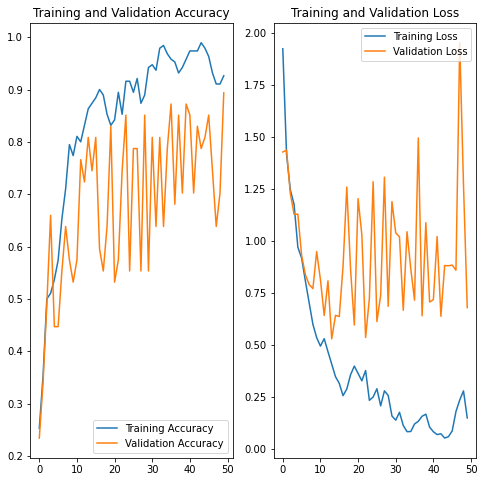

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Xception

In [42]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=18, activation='softmax'),
])

In [43]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [51]:
batch_size = 32
train_set = train_ds.shuffle(1000).repeat()
train_set = train_set.map(partial(preprocess)).batch(batch_size).prefetch(1)
valid_set = val_ds.map(preprocess).batch(batch_size).prefetch(1)

In [52]:
n_classes = 5
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

83689472/83683744 [==============================] - 0s 0us/step


In [53]:
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_25
13 block2_pool
14 batch_normalization
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_26
23 block3_pool
24 batch_normalization_1
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_27
33 block4_pool
34 batch_normalization_2
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepconv

In [56]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=30)

Epoch 1/30
6/6 [==============================] - 14s 745ms/step - loss: 0.0817 - accuracy: 0.9950 - val_loss: 1.8549 - val_accuracy: 0.5106
Epoch 2/30
6/6 [==============================] - 10s 576ms/step - loss: 0.0612 - accuracy: 1.0000 - val_loss: 1.6553 - val_accuracy: 0.5319
Epoch 3/30
6/6 [==============================] - 10s 568ms/step - loss: 0.0317 - accuracy: 1.0000 - val_loss: 1.4495 - val_accuracy: 0.5532
Epoch 4/30
6/6 [==============================] - 10s 582ms/step - loss: 0.0398 - accuracy: 0.9950 - val_loss: 1.1612 - val_accuracy: 0.6596
Epoch 5/30
6/6 [==============================] - 10s 573ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.9626 - val_accuracy: 0.7234
Epoch 6/30
6/6 [==============================] - 10s 570ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.8069 - val_accuracy: 0.7872
Epoch 7/30
6/6 [==============================] - 10s 572ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.7178 - val_accuracy: 0.7872
Epoch 8/30
6/

In [57]:
score = model.evaluate(val_ds)

2/2 [==============================] - 2s 46ms/step - loss: 0.2676 - accuracy: 0.8936
